# Introdução à Análise de Dados com Python
---

## Capítulo 4: Análise de Gastos com Passagens Aéreas (SCDP)

## Informações
* Origem dos dados
```
Portal da Transparência (http://transparencia.gov.br/download-de-dados/viagens)
```
* Dicionário de dados
```
http://transparencia.gov.br/pagina-interna/603364-dicion%C3%A1rio-de-dados-viagens-a-Servi%C3%A7o-Pagamentos
```
* 4 arquivos:
    * 2018_Pagamento.csv
    * 2018_Passagem.csv
    * 2018_Trecho.csv
    * 2018_Viagem.csv

## Perguntas a serem respondidas?

* Qual o trecho mais executado?
* Qual o valor médio para o trecho mais executado?
* Qual a mediana para o trecho mais executado?
* Identificar possíveis outliers nos valores do trecho mais executado

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

plt.rcParams['figure.dpi'] = 90

# Leitura dos Dados
---

In [2]:
"""
Leia o arquivo
'dados/c04_passagens/2018_Passagem.csv.zip'
"""
df_passagens = ___

# Identificação de valores nulos ou faltantes
---

In [3]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    310816 non-null object
UF - Origem volta                      307823 non-null object
Cidade - Origem volta                  310816 non-null object
Pais - Destino volta                   310816 non-null object
UF - Destino volta                     310234 non-null object
Cidade - Destino volta                 310816 non-null object
Valor da passagem     

In [4]:
"""
Vamos verificar algumas estatísticas básicas sobre colunas numéricas.
"""

df_passagens.describe()

,Identificador do processo de viagem
count,310816.00
mean,34950773.58
std,199220763.01
min,14046485.00
25%,14763521.75
50%,14929268.00
75%,15105045.00
max,2018002771.00


In [5]:
"""
Vamos verificar algumas estatísticas básicas sobre as demais colunas.
"""

df_passagens.describe(include='object')

,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
count,310816,310816,303560,310816,310816,301096,310816,310816,307823,310816,310816,310234,310816,310816,310816
unique,4,163,28,913,162,28,997,111,28,541,103,28,352,72794,1641
top,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Distrito Federal,Brasília,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,",00",",00"
freq,293475,303557,80478,80478,301093,79346,79346,287331,287331,287331,287331,287331,287331,3299,281439


In [6]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [7]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

# Conversão das colunas para os tipos de dados corretos e padronização campos
---

In [8]:
"""
Verificamos valores nulos e tipos de dados com o método info() do dataframe.
"""

df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

In [9]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

df_passagens_1 = df_passagens.copy()
df_passagens_1['Valor da passagem'] = ___
df_passagens_1['Taxa de serviço'] = ___

In [10]:
df_passagens_1[['Valor da passagem', 'Taxa de serviço']].head()
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

In [11]:
"""
Padronização das strings é interessante para que a ausência ou a presença de acentos não interfira em agrupamentos.
"""

from libs.texto import TratamentoTexto
def tratar_texto(valor):
    v = valor
    
    # somente realiza o tratamento se o texto não for nulo
    if v:
        # remove acentuação
        v = TratamentoTexto.remover_acentuacao(v)
        # converte para letras maiúsculas
        v = v.upper()
        
    return v

colunas = ['Meio de transporte',
       'País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida',
       'País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta']

# padronize as colunas da lista acima no dataframe df_passagens_1
___ 

df_passagens_1.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00


# Você já está pensando em responder as questões?

Não é uma boa idéia na maioria dos casos.

In [74]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao].groupby(colunas_gb, as_index=False).agg(['count', 'mean', 'median']).sort_values(('Valor da passagem', 'count'), ascending=False).head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA                         14034   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                   13933   
                                                                           SAO PAULO         SAO PAULO                        12271   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA                         12027   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA                          4092   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE                      3980   
                  RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             SAO PAULO         SAO PAULO                         3603   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             MINAS GERAIS      BELO HORIZONTE                    3535   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA                          3499   
                  SAO PAULO         SAO PAULO           BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                    3459   

                                                                                                                          \
                                                                                                                    mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida          
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA             665.59   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       621.79   
                                                                           SAO PAULO         SAO PAULO            696.73   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA             685.14   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA             767.78   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE         713.10   
                  RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             SAO PAULO         SAO PAULO            354.40   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             MINAS GERAIS      BELO HORIZONTE       643.77   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA             643.06   
                  SAO PAULO         SAO PAULO           BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       342.41   

                                                                                                                          
                                                                                                                  median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida         
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA             567.11  
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       527.03  
                                                                           SAO PAULO         SAO PAULO            559.69  
       

# Entendimento e organização dos dados

Vamos olhar as variáveis de interesse separadamente.

## Identificador do processo de viagem

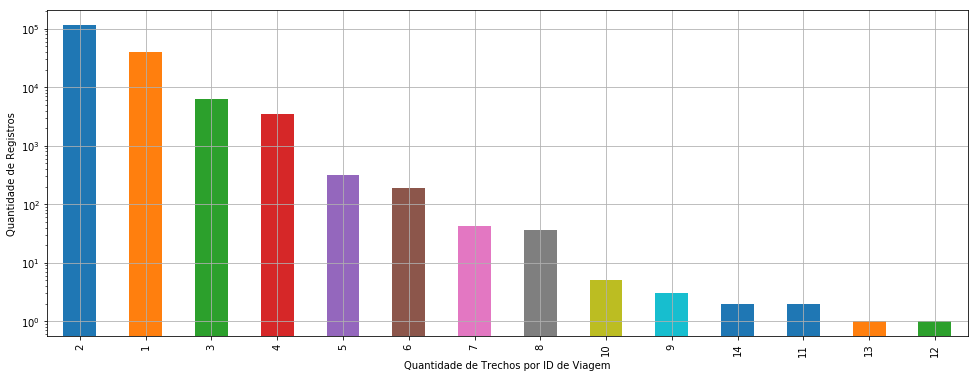

In [12]:
plt.rcParams['figure.figsize'] = (16.5,6)
df_passagens_1['Identificador do processo de viagem'].value_counts().value_counts().plot.bar()
plt.xlabel('Quantidade de Trechos por ID de Viagem')
plt.ylabel('Quantidade de Registros')
plt.yscale('log')
plt.grid(True)
plt.show()

In [15]:
'''
Exemplo de uma viagem com 3 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 14756123 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
74183,14756123,AEREO,BRASIL,CEARA,FORTALEZA,BRASIL,BAHIA,SALVADOR,None,None,None,None,None,None,285.86,0.00
74184,14756123,AEREO,BRASIL,BAHIA,SALVADOR,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,368.31,0.00
74185,14756123,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,552.33,0.00


In [16]:
'''
Exemplo de uma viagem com 5 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 14825056 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
106975,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,MIAMI,ESTADOS UNIDOS DA AMERICA,None,CHARLOTTE - CAROLINA DO NORTE,None,None,None,None,None,None,1762.05,0.00
106976,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,MIAMI,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,1812.01,0.00
106977,14825056,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,MIAMI,None,None,None,None,None,None,1762.05,0.00
106978,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,INDIANAPOLIS,ESTADOS UNIDOS DA AMERICA,None,MIAMI,None,None,None,None,None,None,1762.05,0.00
106979,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,CHARLOTTE - CAROLINA DO NORTE,ESTADOS UNIDOS DA AMERICA,None,INDIANAPOLIS,None,None,None,None,None,None,1762.05,0.00


In [17]:
'''
Exemplo de uma viagem com 14 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 15190575 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
262511,15190575,AEREO,FILIPINAS,None,MANILLA,COREIA DO SUL,None,SEUL,None,None,None,None,None,None,1449.92,0.00
262512,15190575,AEREO,TAILANDIA,None,BANGCOC,LAOS,None,VIENTIANE,None,None,None,None,None,None,1685.39,0.00
262513,15190575,AEREO,LAOS,None,VIENTIANE,TAILANDIA,None,BANGCOC,None,None,None,None,None,None,0.00,0.00
262514,15190575,AEREO,TAILANDIA,None,BANGCOC,MYANMAR,None,NAY PYI TAW,None,None,None,None,None,None,1425.89,0.00
262515,15190575,AEREO,MYANMAR,None,YANGON,FILIPINAS,None,MANILLA,None,None,None,None,None,None,4305.86,0.00
262516,15190575,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,393.66,0.00
262517,15190575,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,SAO PAULO,SAO PAULO,None,None,None,None,None,None,1145.17,0.00
262518,15190575,AEREO,COREIA DO SUL,None,SEUL,MONGOLIA,None,ULAN-BATOR,None,None,None,None,None,None,1403.02,0.00
262519,15190575,AEREO,MYANMAR,None,NAY PYI TAW,MYANMAR,None,YANGON,None,None,None,None,None,None,608.52,0.00
262520,15190575,AEREO,BRASIL,SAO PAULO,SAO PAULO,TAILANDIA,None,BANGCOC,None,None,None,None,None,None,5533.52,0.00


In [18]:
df_passagens_1.describe(include='all')

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
count,310816.00,310816,310816,303560,310816,310816,301096,310816,23485,20492,23485,23485,22903,23485,310816.00,310816.00
unique,nan,4,148,28,912,146,28,996,99,27,540,101,27,351,nan,nan
top,nan,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,nan,nan
freq,nan,293475,303557,80478,80478,301093,79346,79346,20492,5513,5513,22903,7356,7356,nan,nan
mean,34950773.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.33,3.04
std,199220763.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.66,67.42
min,14046485.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
25%,14763521.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.78,0.00
50%,14929268.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.90,0.00
75%,15105045.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.43,0.00


In [19]:
"""
Vamos criar uma coluna que identifica se o trecho faz parte de uma viagem internacional ou não
"""

# vamos marcar trechos que são de origem ou destino internacional
df_passagens_1['Trecho Internacional'] = \
    (df_passagens_1['País - Origem ida'] != 'BRASIL') | (df_passagens_1['País - Destino ida'] != 'BRASIL') \
    | ( df_passagens_1['País - Origem volta'].notnull() & ((df_passagens_1['País - Origem volta'] != 'BRASIL') | (df_passagens_1['Pais - Destino volta'] != 'BRASIL'))) \

df_passagens_1[df_passagens_1['Trecho Internacional']].head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional
6,14223544,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BOLIVIA,None,SANTA CRUZ DE LA SIERRA,None,None,None,None,None,None,767.79,0.00,True
9,14263076,AEREO,BRASIL,SAO PAULO,SAO PAULO,CANADA,None,VANCOUVER,None,None,None,None,None,None,3635.74,0.00,True
16,14292724,AEREO,ESTADOS UNIDOS DA AMERICA,None,AUSTIN,INDIA,None,NOVA DELHI,INDIA,None,NOVA DELHI,ESTADOS UNIDOS DA AMERICA,None,AUSTIN,3637.35,0.00,True
17,14296742,AEREO,BRASIL,SAO PAULO,SAO PAULO,FILIPINAS,None,MANILLA,None,None,None,None,None,None,6108.06,0.00,True
18,14302981,AEREO,BRASIL,SAO PAULO,SAO PAULO,FILIPINAS,None,MANILLA,None,None,None,None,None,None,6117.92,0.00,True


In [21]:
# quais viagens possuem ao menos um trecho internacional
df_viagens_internacionais = \
    df_passagens_1[['Identificador do processo de viagem','Trecho Internacional']]\
    .groupby('Identificador do processo de viagem', as_index=False)\
    .max()

df_viagens_internacionais.head()

,Identificador do processo de viagem,Trecho Internacional
0,14046485,False
1,14166390,False
2,14201345,False
3,14223544,True
4,14227023,False


In [22]:
# quais processos de viagem possuem trechos internacionais
df_viagens_internacionais = df_viagens_internacionais.rename(columns={'Trecho Internacional': 'Viagem Internacional'})
df_viagens_internacionais.head()

,Identificador do processo de viagem,Viagem Internacional
0,14046485,False
1,14166390,False
2,14201345,False
3,14223544,True
4,14227023,False


In [23]:
df_passagens_2 = pd.merge(df_passagens_1, df_viagens_internacionais, how='left', 
                          left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')
df_passagens_2.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,False


In [24]:
df_passagens_2[df_passagens_2['Identificador do processo de viagem'] == 14342418]


,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional
50,14342418,AEREO,BRASIL,MINAS GERAIS,GOVERNADOR VALADARES,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,496.60,0.00,False,True
51,14342418,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,MINAS GERAIS,GOVERNADOR VALADARES,None,None,None,None,None,None,233.50,0.00,False,True
52,14342418,AEREO,ARGENTINA,None,BUENOS AIRES,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,1008.63,0.00,True,True
53,14342418,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,ARGENTINA,None,BUENOS AIRES,None,None,None,None,None,None,1398.93,0.00,True,True


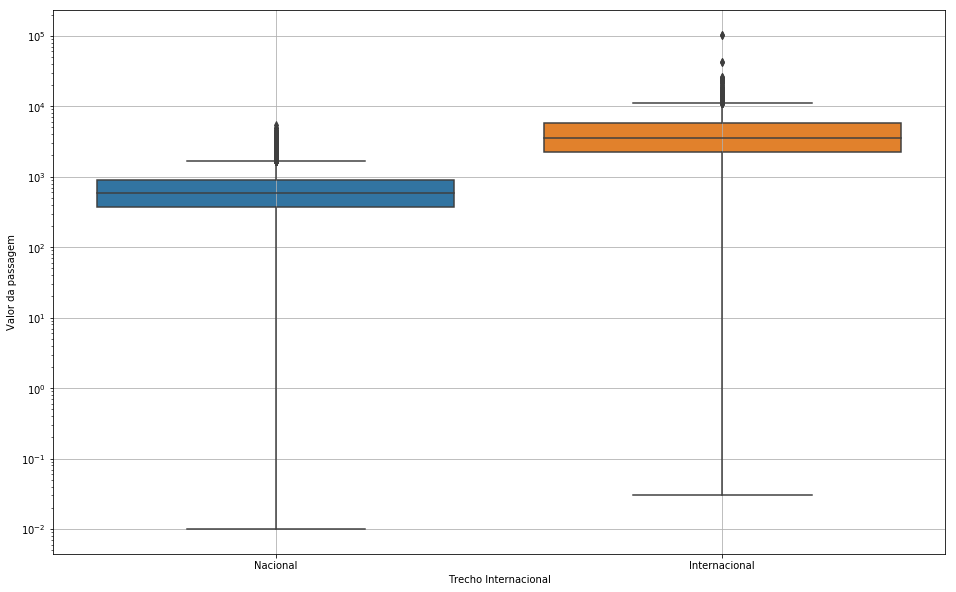

In [25]:
df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem'] > 0.001] 
plt.rcParams['figure.figsize'] = 16,10
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'], x=df_passagens_g['Trecho Internacional'].apply(lambda x: 'Internacional' if x else 'Nacional'))
ax.set_yscale('log')
ax.plot(x=[-1000, 1000], y=[2000,2000], color='red', linewidth=2, markersize=12)
plt.grid(True)
plt.show()

### Observações

* Número de trechos interfere no valor das passagens?
* Trechos domésticos e viagens internacionais possuem valor superior aos dos trechos domésticos em viagens nacionais?
* Trechos com valores muito baixos. Como isso é possível?

## Meio de transporte
---

In [26]:
df_passagens_1['Meio de transporte'].value_counts().to_frame()

,Meio de transporte
AEREO,293475
RODOVIARIO,14594
FLUVIAL,2733
FERROVIARIO,14


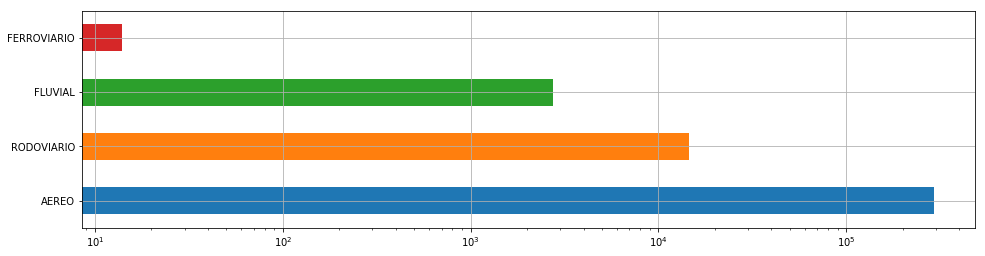

In [27]:
plt.rcParams["figure.figsize"] = 16, 4
ax = df_passagens_1['Meio de transporte'].value_counts().plot.barh()
ax.set_xscale('log')
plt.grid(True)
plt.show()

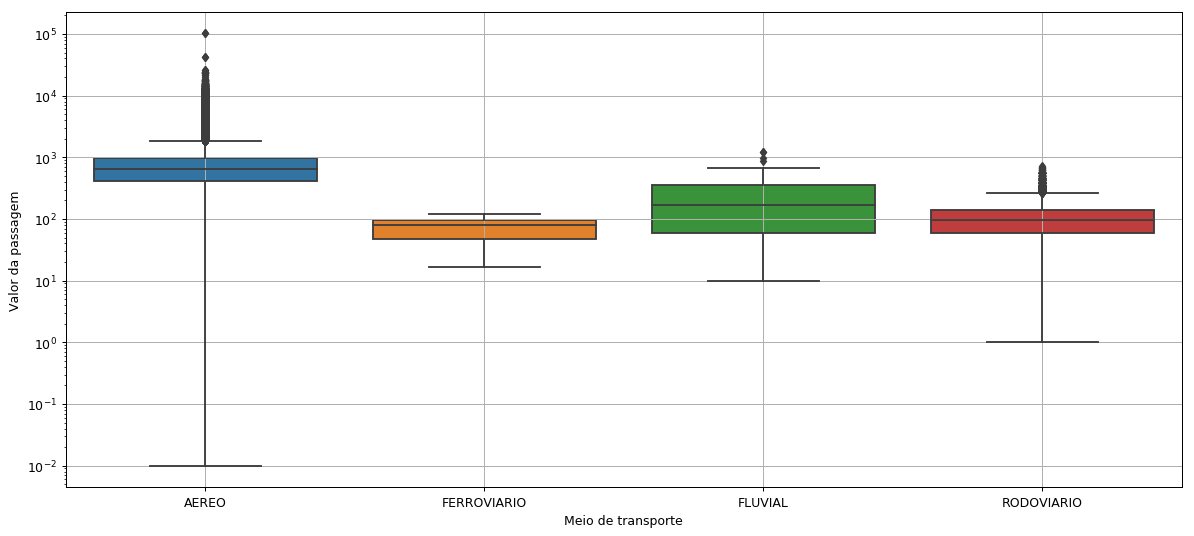

In [28]:
plt.rcParams['figure.figsize'] = 16,7
plt.rcParams['figure.dpi'] = 90

df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem']>0]

sns.boxplot(df_passagens_g['Meio de transporte'], df_passagens_g['Valor da passagem'], order=df_passagens_g['Meio de transporte'].drop_duplicates().sort_values())
plt.yscale('log')
plt.ylim = [0, 150000]
plt.grid(True)
plt.show()

### Observações

* Trechos aéreos acompanhados de outras modalidades possuem valor diferenciado?
* Foco nos trechos aéreos

## Taxa de Serviço
---

In [29]:
"""
Muitos registros zerados.
""" 
df_passagens_1['Taxa de serviço'].value_counts().head()

0.00    281439
1.14      9121
0.01      4640
0.49      2043
5.00      1477
Name: Taxa de serviço, dtype: int64

In [30]:
df_passagens_1['Taxa de serviço'].describe().to_frame()

,Taxa de serviço
count,310816.00
mean,3.04
std,67.42
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,8729.52


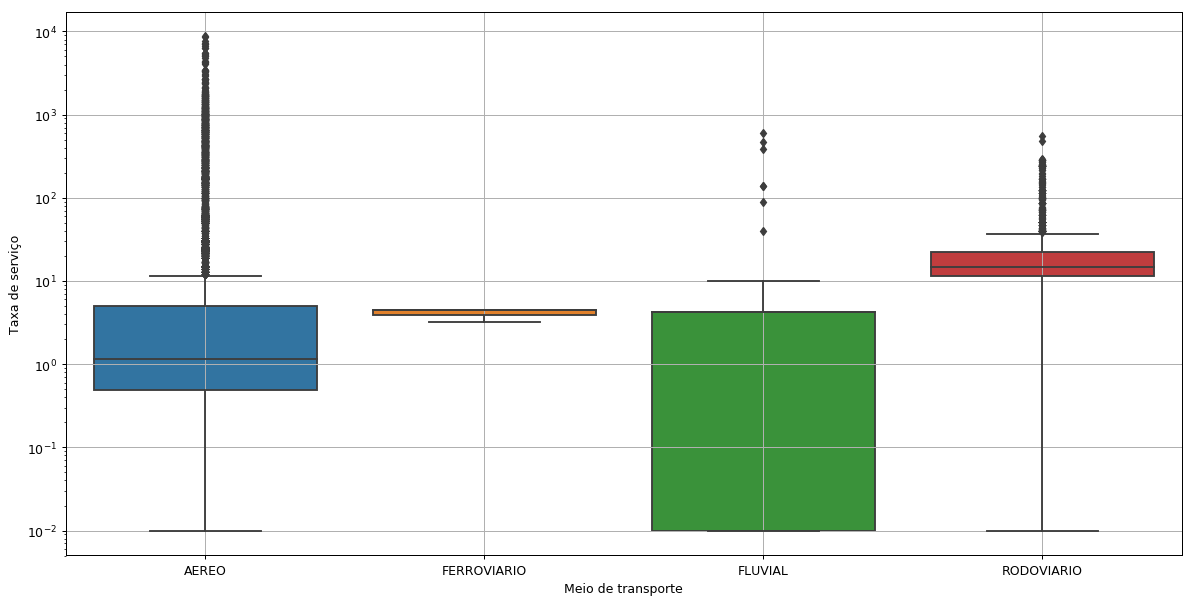

In [68]:
df_passagens_g = df_passagens_2[df_passagens_2['Taxa de serviço']>0]
plt.rcParams['figure.figsize'] = 16,8
sns.boxplot(x='Meio de transporte', y='Taxa de serviço', data=df_passagens_g, order=df_passagens_g['Meio de transporte'].drop_duplicates().sort_values())
plt.yscale('log')
plt.grid(True)
plt.show()

### Observações

* Campo com poucas observações relevantes.
* Talvez seja interessante investigar os outliers com valores altos.
* Para o propósito levantado inicialmente, este campo não é necessário.

## Origem, Destino, Ida e Volta

In [75]:
"""
Ocorrência da mesma variável em mais de uma coluna no dataset.
"""

df_passagens_2.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,False


In [84]:
"""
Vamos organizar.
"""

df_passagens_3 = df_passagens_2.copy()


In [85]:
df_passagens_3[df_passagens_3['País - Origem volta'].notnull()].shape

(23485, 18)

In [86]:
"""
Vamos quebrar as linhas que possuem os trachos de ida e volta.
"""

df_passagens_3['Tipo Trecho'] = 'IDA'
df_passagens_3['Tipo Compra'] = 'SEPARADA'

voltas = []

for idx, df in df_passagens_3[df_passagens_3['País - Origem volta'].notnull()].iterrows():
    valor_passagem = df_passagens_3.at[idx, 'Valor da passagem'] / 2
    
    df_passagens_3.at[idx, 'Valor da passagem'] = valor_passagem
    df_passagens_3.at[idx, 'Tipo Compra'] = 'CONJUNTA'
    
    for ic in range(8,14):
        df_passagens_3.iat[idx, ic] = None
    
    df['Tipo Trecho'] = 'VOLTA'
    df['Tipo Compra'] = 'CONJUNTA'
    df['Valor da passagem'] = valor_passagem
    
    df['País - Origem ida'] = df['País - Origem volta']
    df['UF - Origem ida'] = df['UF - Origem volta']
    df['Cidade - Origem ida'] = df['Cidade - Origem volta']
    df['País - Destino ida'] = df['Pais - Destino volta']
    df['UF - Destino ida'] = df['UF - Destino volta']
    df['Cidade - Destino ida'] = df['Cidade - Destino volta']
    
    df['País - Origem volta'] = None
    df['UF - Origem volta'] = None
    df['Cidade - Origem volta'] = None
    df['Pais - Destino volta'] = None
    df['UF - Destino volta'] = None
    df['Cidade - Destino volta'] = None    
    
    voltas.append(df)
    
    

In [88]:
df_voltas = pd.concat(voltas, ignore_index=False, axis=1).T
df_voltas.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra
10,14271222,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,143.12,0.00,False,False,VOLTA,CONJUNTA
15,14271373,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,115.30,0.00,False,False,VOLTA,CONJUNTA
16,14292724,AEREO,INDIA,None,NOVA DELHI,ESTADOS UNIDOS DA AMERICA,None,AUSTIN,None,None,None,None,None,None,1818.67,0.00,True,True,VOLTA,CONJUNTA
21,14303414,AEREO,NICARAGUA,None,MANAGUA,MEXICO,None,CIDADE DO MEXICO,None,None,None,None,None,None,869.09,0.00,True,True,VOLTA,CONJUNTA
22,14303414,AEREO,NICARAGUA,None,MANAGUA,MEXICO,None,CIDADE DO MEXICO,None,None,None,None,None,None,868.01,0.00,True,True,VOLTA,CONJUNTA


In [89]:
df_passagens_4 = pd.concat([df_passagens_3, df_voltas])
df_passagens_4.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,False,IDA,SEPARADA
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,False,IDA,SEPARADA
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,False,IDA,SEPARADA
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,False,IDA,SEPARADA
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,False,IDA,SEPARADA


In [90]:
df_passagens_4 = df_passagens_4.sort_values(['Identificador do processo de viagem', 'Tipo Trecho']).reset_index(drop=True)
df_passagens_4.loc[10:11]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra
10,14271222,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,143.12,0.00,False,False,IDA,CONJUNTA
11,14271222,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,143.12,0.00,False,False,VOLTA,CONJUNTA


In [91]:
df_passagens_5 = df_passagens_4.drop(['País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta'], axis=1)
df_passagens_5.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,False,IDA,SEPARADA
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,False,IDA,SEPARADA
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,False,IDA,SEPARADA
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,False,IDA,SEPARADA
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,False,IDA,SEPARADA


In [97]:
"""
Vamos utilizar apenas a sigla do estado.
"""
df_ufs = pd.read_csv('./dados/lista_ufs.csv', sep=';', encoding='latin1')
df_ufs['UF'] = df_ufs['UF'].apply(tratar_texto)

df_ufs.head()

,UF,SG_UF
0,ACRE,AC
1,ALAGOAS,AL
2,AMAPA,AP
3,AMAZONAS,AM
4,BAHIA,BA


In [93]:
df_passagens_6 = pd.merge(df_passagens_5, df_ufs, left_on='UF - Origem ida', right_on='UF', how='left')
df_passagens_6.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF,SG_UF
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,False,IDA,SEPARADA,CEARA,CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,False,IDA,SEPARADA,CEARA,CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,False,IDA,SEPARADA,PARANA,PR
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,False,IDA,SEPARADA,MATO GROSSO,MT
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,False,IDA,SEPARADA,PARANA,PR


In [94]:
df_passagens_6 = pd.merge(df_passagens_6, df_ufs, left_on='UF - Destino ida', right_on='UF', how='left')

In [95]:
df_passagens_6.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF_x,SG_UF_x,UF_y,SG_UF_y
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,False,IDA,SEPARADA,CEARA,CE,CEARA,CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,False,IDA,SEPARADA,CEARA,CE,CEARA,CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,False,IDA,SEPARADA,PARANA,PR,MATO GROSSO,MT
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,False,IDA,SEPARADA,MATO GROSSO,MT,PARANA,PR
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,False,IDA,SEPARADA,PARANA,PR,RIO GRANDE DO SUL,RS


In [103]:
"""
Vamos concatenar Cidade e UF em uma única coluna
"""
df_passagens_7 = df_passagens_6.copy()
df_passagens_7['Origem'] = df_passagens_7['Cidade - Origem ida'] + '-' + df_passagens_7['SG_UF_x'].apply(lambda x: x if pd.notnull(x) else '')
df_passagens_7['Destino'] = df_passagens_7['Cidade - Destino ida'] + '-' + df_passagens_7['SG_UF_y'].apply(lambda x: x if pd.notnull(x) else '')
df_passagens_7.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF_x,SG_UF_x,UF_y,SG_UF_y,Origem,Destino
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,False,IDA,SEPARADA,CEARA,CE,CEARA,CE,FORTALEZA-CE,SOBRAL-CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,False,IDA,SEPARADA,CEARA,CE,CEARA,CE,SOBRAL-CE,FORTALEZA-CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,False,IDA,SEPARADA,PARANA,PR,MATO GROSSO,MT,LONDRINA-PR,SINOP-MT
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,False,IDA,SEPARADA,MATO GROSSO,MT,PARANA,PR,SINOP-MT,LONDRINA-PR
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,False,IDA,SEPARADA,PARANA,PR,RIO GRANDE DO SUL,RS,CURITIBA-PR,PORTO ALEGRE-RS


In [104]:
"""
Selecionamos apenas as colunas desejadas e renomeamos elas
"""
df_passagens_7 = df_passagens_7[['Identificador do processo de viagem', 'Origem', 'Destino', 'Valor da passagem', 'Taxa de serviço', 'Trecho Internacional', 'Viagem Internacional', 'Tipo Trecho', 'Tipo Compra', 'Meio de transporte']]
df_passagens_7.columns = ['ID_VIAGEM', 'ORIGEM', 'DESTINO', 'VALOR', 'TAXA', 'TRECHO_INT', 'VIAGEM_INT', 'TIPO_TRECHO', 'TIPO_COMPRA', 'MEIO_TRANSPORTE']
df_passagens_7['VIAGEM_INT'] = df_passagens_7['VIAGEM_INT'].apply(lambda x: 1 if x else 0)
df_passagens_7['TRECHO_INT'] = df_passagens_7['TRECHO_INT'].apply(lambda x: 1 if x else 0)
df_passagens_7.head()

,ID_VIAGEM,ORIGEM,DESTINO,VALOR,TAXA,TRECHO_INT,VIAGEM_INT,TIPO_TRECHO,TIPO_COMPRA,MEIO_TRANSPORTE
0,14046485,FORTALEZA-CE,SOBRAL-CE,40.95,13.51,0,0,IDA,SEPARADA,RODOVIARIO
1,14046485,SOBRAL-CE,FORTALEZA-CE,33.25,10.97,0,0,IDA,SEPARADA,RODOVIARIO
2,14166390,LONDRINA-PR,SINOP-MT,518.09,0.00,0,0,IDA,SEPARADA,AEREO
3,14166390,SINOP-MT,LONDRINA-PR,665.38,0.00,0,0,IDA,SEPARADA,AEREO
4,14201345,CURITIBA-PR,PORTO ALEGRE-RS,369.30,0.00,0,0,IDA,SEPARADA,AEREO


In [105]:
df_passagens_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334301 entries, 0 to 334300
Data columns (total 10 columns):
ID_VIAGEM          334301 non-null object
ORIGEM             334301 non-null object
DESTINO            334301 non-null object
VALOR              334301 non-null object
TAXA               334301 non-null object
TRECHO_INT         334301 non-null int64
VIAGEM_INT         334301 non-null int64
TIPO_TRECHO        334301 non-null object
TIPO_COMPRA        334301 non-null object
MEIO_TRANSPORTE    334301 non-null object
dtypes: int64(2), object(8)
memory usage: 28.1+ MB


In [106]:
"""
Fazemos novamente um tratamento de tipos de dados para as colunas
"""
df_passagens_7['VALOR'] = df_passagens_7['VALOR'].astype(np.float64)
df_passagens_7['TAXA'] = df_passagens_7['TAXA'].astype(np.float64)

df_passagens_7['ORIGEM'] = df_passagens_7['ORIGEM'].astype('category')
df_passagens_7['DESTINO'] = df_passagens_7['DESTINO'].astype('category')

df_passagens_7['TIPO_TRECHO'] = df_passagens_7['TIPO_TRECHO'].astype('category')
df_passagens_7['TIPO_COMPRA'] = df_passagens_7['TIPO_COMPRA'].astype('category')

df_passagens_7.head()

,ID_VIAGEM,ORIGEM,DESTINO,VALOR,TAXA,TRECHO_INT,VIAGEM_INT,TIPO_TRECHO,TIPO_COMPRA,MEIO_TRANSPORTE
0,14046485,FORTALEZA-CE,SOBRAL-CE,40.95,13.51,0,0,IDA,SEPARADA,RODOVIARIO
1,14046485,SOBRAL-CE,FORTALEZA-CE,33.25,10.97,0,0,IDA,SEPARADA,RODOVIARIO
2,14166390,LONDRINA-PR,SINOP-MT,518.09,0.00,0,0,IDA,SEPARADA,AEREO
3,14166390,SINOP-MT,LONDRINA-PR,665.38,0.00,0,0,IDA,SEPARADA,AEREO
4,14201345,CURITIBA-PR,PORTO ALEGRE-RS,369.30,0.00,0,0,IDA,SEPARADA,AEREO


In [107]:
"""
É possível ver que não existem mais registros com informações nulas e os tipos de dados estão adequados para cada situação.
"""
df_passagens_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334301 entries, 0 to 334300
Data columns (total 10 columns):
ID_VIAGEM          334301 non-null object
ORIGEM             334301 non-null category
DESTINO            334301 non-null category
VALOR              334301 non-null float64
TAXA               334301 non-null float64
TRECHO_INT         334301 non-null int64
VIAGEM_INT         334301 non-null int64
TIPO_TRECHO        334301 non-null category
TIPO_COMPRA        334301 non-null category
MEIO_TRANSPORTE    334301 non-null object
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 19.9+ MB


In [127]:
"""
Vamos eliminar todas as viagens internacionais.
Vamos também manter apenas o meio de transporte AEREO
"""
df_passagens_8 = df_passagens_7[df_passagens_7['VIAGEM_INT'] == False]
df_passagens_8 = df_passagens_8[df_passagens_8['MEIO_TRANSPORTE'] == 'AEREO'].reset_index(drop=True)
df_passagens_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296486 entries, 0 to 296485
Data columns (total 10 columns):
ID_VIAGEM          296486 non-null object
ORIGEM             296486 non-null category
DESTINO            296486 non-null category
VALOR              296486 non-null float64
TAXA               296486 non-null float64
TRECHO_INT         296486 non-null int64
VIAGEM_INT         296486 non-null int64
TIPO_TRECHO        296486 non-null category
TIPO_COMPRA        296486 non-null category
MEIO_TRANSPORTE    296486 non-null object
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 15.4+ MB


In [128]:
df_passagens_8[['ORIGEM','DESTINO']]\
    .groupby(['ORIGEM','DESTINO'])\
    .size().reset_index(name='TOTAL').sort_values('TOTAL', ascending=False).head(10)

,ORIGEM,DESTINO,TOTAL
3503,RIO DE JANEIRO-RJ,BRASILIA-DF,14987
615,BRASILIA-DF,RIO DE JANEIRO-RJ,14825
3981,SAO PAULO-SP,BRASILIA-DF,12750
632,BRASILIA-DF,SAO PAULO-SP,12592
3071,PORTO ALEGRE-RS,BRASILIA-DF,4252
606,BRASILIA-DF,PORTO ALEGRE-RS,4179
536,BRASILIA-DF,BELO HORIZONTE-MG,3802
367,BELO HORIZONTE-MG,BRASILIA-DF,3783
4037,SAO PAULO-SP,RIO DE JANEIRO-RJ,3767
3585,RIO DE JANEIRO-RJ,SAO PAULO-SP,3725


In [129]:
"""
Vamos calcular a quantidade de ocorrências, média, mediana e desvio padrão por trecho
"""



'\nVamos calcular a quantidade de ocorrências, média, mediana e desvio padrão por trecho\n'

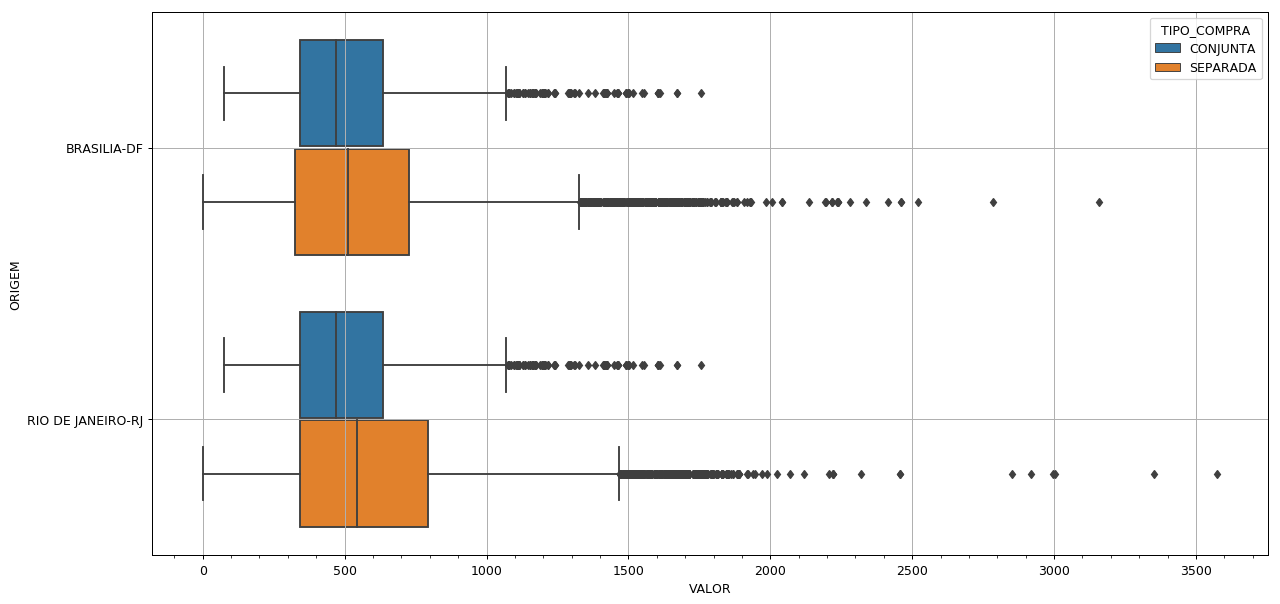

In [130]:
filtro_a = (df_passagens_7['ORIGEM'] == 'RIO DE JANEIRO-RJ') & (df_passagens_7['DESTINO'] == 'BRASILIA-DF')
filtro_b = (df_passagens_7['ORIGEM'] == 'BRASILIA-DF') & (df_passagens_7['DESTINO'] == 'RIO DE JANEIRO-RJ')

df_passagens_g = df_passagens_7[ (filtro_a | filtro_b) ].copy()

df_passagens_g['ORIGEM'] = df_passagens_g['ORIGEM'].astype(str)

ax = sns.boxplot(x='VALOR', y='ORIGEM', data=df_passagens_g, hue='TIPO_COMPRA')

ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(100))
plt.grid(True)
plt.show()

In [131]:
df_passagens_g.describe()

,VALOR,TAXA,TRECHO_INT,VIAGEM_INT
count,29903.00,29903.00,29903.00,29903.00
mean,602.09,2.03,0.00,0.00
std,365.51,38.55,0.00,0.06
min,0.00,0.00,0.00,0.00
25%,333.84,0.00,0.00,0.00
50%,517.71,0.00,0.00,0.00
75%,740.02,0.00,0.00,0.00
max,3575.03,1760.90,0.00,1.00


In [ ]:
"""
Desenhe um histograma com os valores encontrados para o trecho mais frequente. (Considere ida ou volta)
"""


In [ ]:
"""
Identifique os outliers utilizando as marcações do boxplot.

IQR = q3 - q1
limite inferior = q1 - 1.5*IQR
limite superior = q3 + 1.5*IQR
"""


In [ ]:
"""
Utilize o dataframe df_viagem para incluir as informações de Órgão Solicitante e Motivo da Viagem
"""
df_viagem = pd.read_csv('dados/c04_passagens/2018_Viagem.csv.zip', sep=';', encoding='iso-8859-1', error_bad_lines=False, quotechar="\"")
df_viagem.head()

In [ ]:
"""
Identifique os órgãos com mais ocorrências entre os outliers.
"""

___
__Material produzido para o curso__:
* Introdução à Análise de Dados com Python

__Autor__:
* Fernando Sola Pereira

__Revisão__:
* 1.1